# Adult dataset

For the Final Project, we will do statistical analysis on the Census Income dataset available at the UC
Irvine Machine Learning Repository.

Here is the information on the dataset:
- Dataset Characteristics: Multivariate
- Subject Area: Social Science
- Associated Tasks: Classification
- Feature Type: Categorical, Integer
- No. of Instances: 48842
- No. of Features: 14

In [149]:
# import libraries

import pandas as pd
from matplotlib import gridspec
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

# columns of interest
column_names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]

# read data
df = pd.read_csv('adult/adult.data', names=column_names)

# get smaller chunk of data if desired
do_split = True
if do_split:
    df_shuffled = df.sample(frac=1,random_state = 51)
    result = np.array_split(df_shuffled, 50)
    data = result[0]
    n = data.shape[0]
    data.index = range(0,n)
else:
    data = df

/usr/local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [120]:
# get information about the size of the dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,40,Private,225432,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
1,32,Self-emp-not-inc,420895,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,47,United-States,<=50K
2,42,Private,175935,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,1980,46,United-States,<=50K
3,35,Private,172186,Some-college,10,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,30,Private,220939,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [121]:
# split into test and train data
train, test = train_test_split(data, test_size=0.2)

In [122]:
# look at training data
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
642,21,Private,434102,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
512,33,Local-gov,100734,HS-grad,9,Divorced,Tech-support,Not-in-family,White,Female,0,0,55,United-States,<=50K
620,33,Private,529104,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,United-States,<=50K
640,49,State-gov,122177,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
297,34,Private,137900,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,<=50K


In [123]:
# look at test data
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,40,Private,225432,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
73,42,Private,42703,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
402,64,?,178724,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,20,United-States,<=50K
184,26,Private,117833,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,1669,50,United-States,<=50K
207,60,Self-emp-not-inc,25825,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,>50K


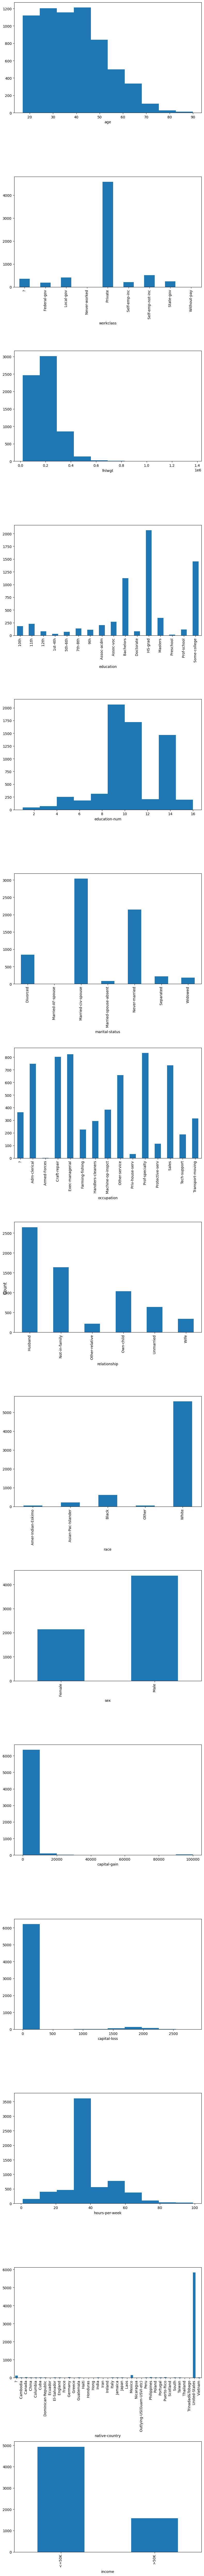

In [147]:
# Plotting function for discrete variables

import math

def discrete_plots(df, columns, num_cols):
    n_plots = len(columns)
    n_cols = num_cols
    n_rows = int(math.ceil(n_plots/n_cols))
    gs = gridspec.GridSpec(n_rows, n_cols)
    fig = plt.figure(figsize=(8,100))
    for i in range(n_plots):
        ax = fig.add_subplot(gs[i])
        if df.dtypes[columns[i]] != 'int64':
            df[columns[i]].value_counts().sort_index().plot(kind='bar', ax=ax)
        else:
            df[columns[i]].hist(ax=ax, grid=False) 
        ax.set_xlabel(columns[i])
    fig.tight_layout()
    fig.supylabel('Count')
    plt.show()

discrete_plots(test_data,column_names,1)

<Axes: xlabel='workclass'>

<Figure size 640x480 with 0 Axes>

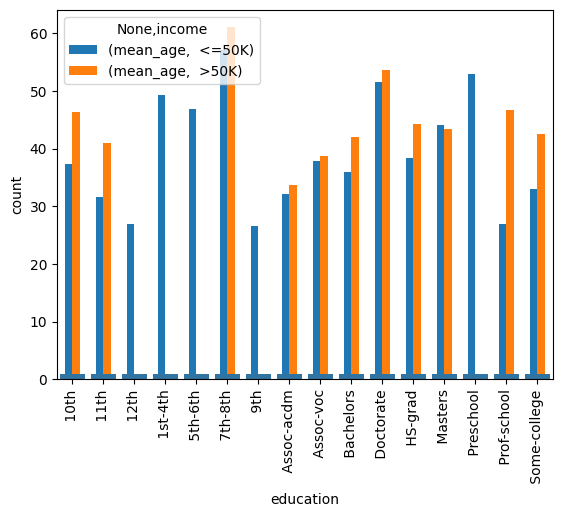

<Figure size 640x480 with 0 Axes>

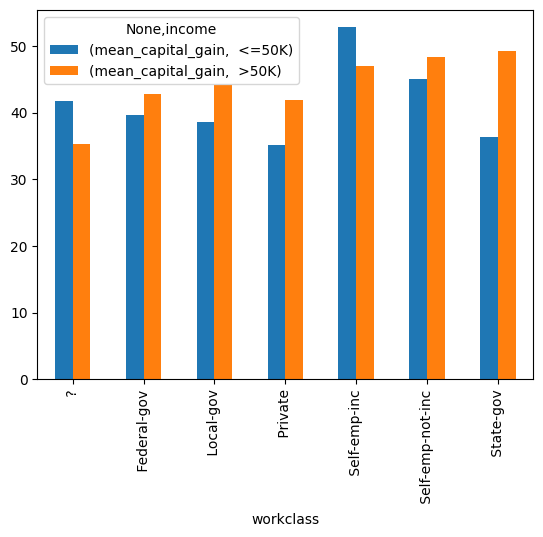

In [151]:
# plot barplot grouped by education and income

plt.figure()
data.groupby(['education','income']).agg(mean_age=('age', 'mean')).unstack().plot.bar()
sns.countplot(data['age'])
plt.figure()
data.groupby(['workclass','income']).agg(mean_capital_gain=('age', 'mean')).unstack().plot.bar()


In [142]:
data['age'].max()

90

In [143]:
test_data.shape[0]

6512